<a href="https://colab.research.google.com/github/aynaval/Coronavirus_Tweet_Sentiment_Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv('/content/drive/MyDrive/coronaa/Copy of Coronavirus Tweets.csv',encoding = "ISO-8859-1")

In [21]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [22]:
data.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
23792,27591,72543,SF Bay Area,26-03-2020,Egg prices are skyrocketing because of coronav...,Negative
8546,12345,57297,NaN,19-03-2020,@TheRickWilson @instructables @hackaday Check ...,Neutral
20738,24537,69489,"Croydon, Surrey",25-03-2020,Thanks to @LabourSJ for putting together an up...,Extremely Positive
1095,4894,49846,??,17-03-2020,Two grocery store later! We have everything th...,Positive
6947,10746,55698,Mississippi & New Orleans,19-03-2020,People testing positive for #coronavirus shoul...,Positive


In [23]:
data.tail(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [24]:
data['Sentiment'].nunique()

5

In [25]:
data.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,A customer returned a Zipsak to @biaggiluggage...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


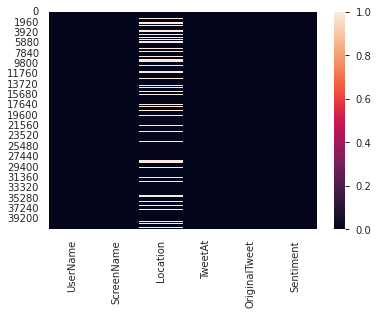

In [26]:
sns.heatmap(data.isnull());

In [27]:
pd.concat([data.isnull().sum(),round((data.isnull().sum()/len(data.index))*100,2)],axis=1,keys=['Missing values','Percent'])

,Missing values,Percent
UserName,0,0.00
ScreenName,0,0.00
Location,8590,20.87
TweetAt,0,0.00
OriginalTweet,0,0.00
Sentiment,0,0.00


In [28]:
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file='corona.html')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [32]:
data.shape

(41157, 6)

In [34]:
data.size

246942

In [31]:
data.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

## **EDA**

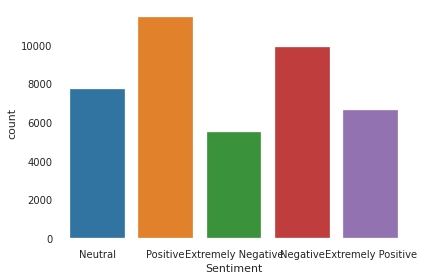

In [39]:
sns.countplot(x=data['Sentiment'])
plt.tight_layout();

In [57]:
(data['Location'].value_counts()<10)

London                        False
United States                 False
London, England               False
New York, NY                  False
Washington, DC                False
                              ...  
Indy, SF, NYC ??               True
my business                    True
united stated, nation wide     True
some place higher              True
Bronx, New York                True
Name: Location, Length: 12220, dtype: bool

In [65]:
data['Location'].value_counts()[data['Location'].value_counts()==1]

Cleveland Ohio                 1
Colchester, VT                 1
Sydney, New South Whales ?     1
Big Mountain Stronghold        1
H-Town born and raised. ???    1
                              ..
Indy, SF, NYC ??               1
my business                    1
united stated, nation wide     1
some place higher              1
Bronx, New York                1
Name: Location, Length: 9406, dtype: int64